# လိုအပ်သော libraries များကို import ပြုလုပ်ခြင်း

In [1]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Iris dataset ကို ရယူခြင်း

In [2]:
Iris_data = load_iris()
print(Iris_data.)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Iris dataset ၏ data များနှင့် feature များကိုကြည့်မြင်ခြင်း

In [6]:
Iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Iris dataset ၏ data များနှင့် target များကို ရယူ၍ Model တည်ဆောက်ရန် data သတ်မှတ်ခြင်း

In [7]:
X = Iris_data.data
y = Iris_data.target

# Data များကို training နှင့် testing အတွက် ပိုင်းခြားခြင်း

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


# Data များကို scaling ပြုလုပ်ခြင်း

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.47639181, -1.69145955,  0.08910607,  0.08782308],
       [ 1.2447657 ,  0.11276397,  0.72366489,  1.41703726],
       [ 0.1383073 , -0.33829191,  0.3775419 ,  0.35366592],
       [ 0.38418694, -0.33829191,  0.26216757,  0.08782308],
       [ 1.12182588,  0.33829191,  1.18516222,  1.41703726],
       [-1.09109092, -1.69145955, -0.31470409, -0.31094117],
       [-1.33697057,  0.78934779, -1.29538591, -1.37431252],
       [ 0.26124712, -1.01487573,  1.01210072,  0.2207445 ],
       [-0.84521128,  0.78934779, -1.41076024, -1.37431252],
       [ 0.99888606,  0.11276397,  0.31985473,  0.2207445 ],
       [-0.9681511 ,  1.01487573, -1.41076024, -1.37431252],
       [-0.84521128,  1.01487573, -1.35307308, -1.37431252],
       [-0.47639181,  1.01487573, -1.46844741, -1.37431252],
       [-1.21403075, -1.24040367,  0.3775419 ,  0.61950875],
       [ 0.38418694,  0.78934779,  0.89672639,  1.41703726],
       [ 2.47416393,  1.69145955,  1.47359805,  1.018273  ],
       [-0.59933163,  0.

# KNN model  တည်ဆောက်ခြင်း (k=5)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)

# Model ကို traning ပြုလုပ်ခြင်း

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

 # Trained model ကို evaluate ပြုလုပ်ခြင်း

In [22]:
y_pred = knn.predict(X_test)
# print the score
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9736842105263158


# Cross Validation နည်းလမ်းဖြင့် accuracy တွက်ခြင်း

In [23]:
# import k-folder
from sklearn.model_selection import cross_val_score
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


#  Cross Validating နည်းလမ်းဖြင့် K အရေအတွက်ရှာဖွေခြင်း

In [24]:
# choose k between 1 to 31
k_range = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

#result = metrics.confusion_matrix(y_test, y_pred)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334]


# ရလဒ်ကို graph ဖြင့် ကြည့်မြင်ခြင်း

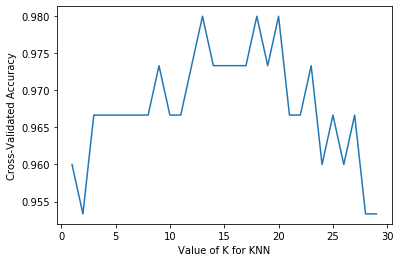

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [26]:
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1],[4,3,1.3,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginicia
virginicia
